In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

RANDOM_STATE = 55

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [5]:
df=pd.get_dummies(data=df, prefix=cat_variables,columns=cat_variables)

In [6]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [7]:
var=[x for x in df.columns if x not in 'HeartDisease']

In [8]:
print(len(var))

20


In [9]:
X_train,X_test,y_train,y_test=train_test_split(df[var],df['HeartDisease'],train_size=0.8, random_state=RANDOM_STATE)

In [10]:
print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
test samples: 184
target proportion: 0.5518


In [11]:
min_samples_split_list=[2,10,30,50,100,200,300,700]
max_depth_list=[1,2,3,4,8,16,32,64,None]

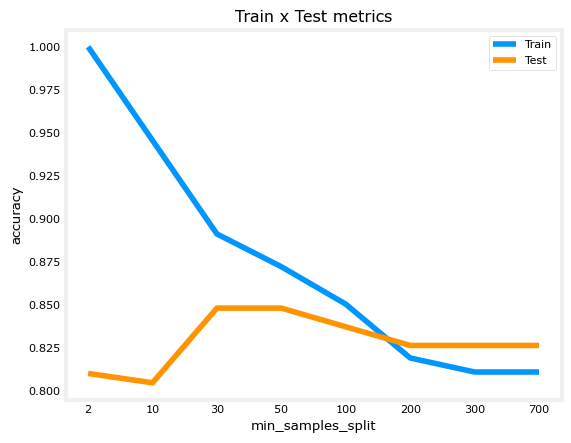

In [21]:
accuracy_list_train=[]
accuracy_list_test=[]
for min_samples_split in min_samples_split_list:
    model=DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_test=model.predict(X_test)
    accuracy_train=accuracy_score(predictions_train,y_train)
    accuracy_test=accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
    
plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

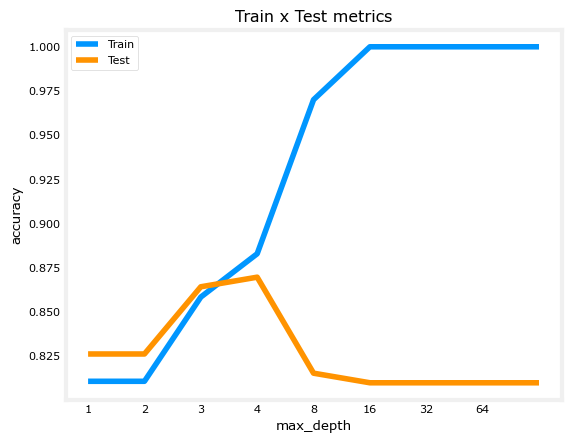

In [23]:
accuracy_list_train=[]
accuracy_list_test=[]
for max_depth in max_depth_list:
    model=DecisionTreeClassifier(max_depth=max_depth,random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train)
    predictions_test=model.predict(X_test)
    accuracy_train=accuracy_score(predictions_train,y_train)
    accuracy_test=accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
    
plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

In [24]:
decision_tree_model=DecisionTreeClassifier(min_samples_split=50,max_depth=3,random_state=RANDOM_STATE).fit(X_train,y_train)

In [25]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics test:
	Accuracy score: 0.8641


In [12]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list=[10,50,100,500]

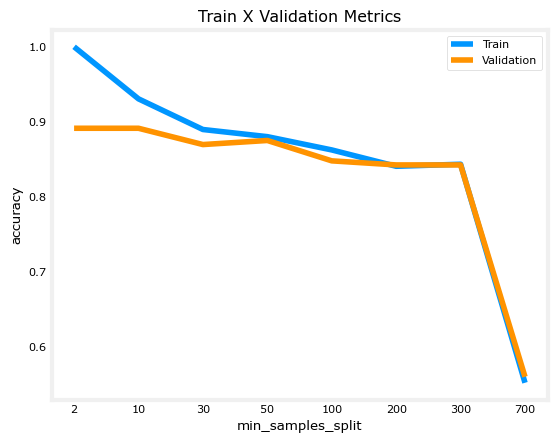

In [14]:
accuracy_list_train=[]
accuracy_list_test=[]
for min_samples_split in min_samples_split_list:
    model=RandomForestClassifier(min_samples_split=min_samples_split, random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    accuracy_train=accuracy_score(predictions_train,y_train)
    accuracy_test=accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train X Validation Metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

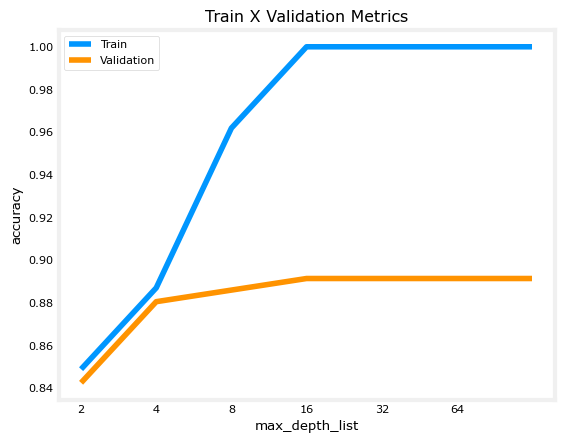

In [15]:
accuracy_list_train=[]
accuracy_list_test=[]
for max_depth in max_depth_list:
    model=RandomForestClassifier(max_depth=max_depth, random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    accuracy_train=accuracy_score(predictions_train,y_train)
    accuracy_test=accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train X Validation Metrics')
plt.xlabel('max_depth_list')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

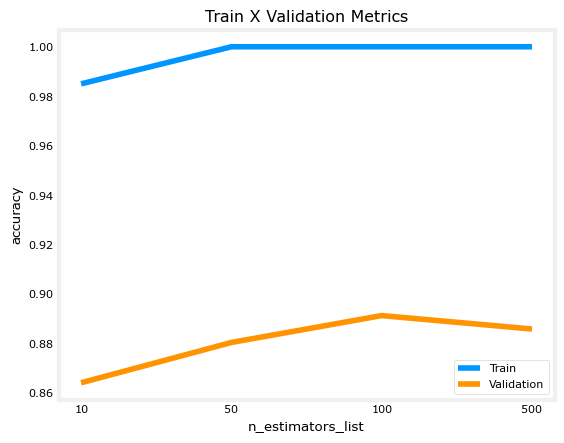

In [16]:
accuracy_list_train=[]
accuracy_list_test=[]
for n_estimators in n_estimators_list:
    model=RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE).fit(X_train,y_train)
    predictions_train=model.predict(X_train)
    predictions_test=model.predict(X_test)
    accuracy_train=accuracy_score(predictions_train,y_train)
    accuracy_test=accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train X Validation Metrics')
plt.xlabel('n_estimators_list')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimators_list)),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [18]:
model=RandomForestClassifier(min_samples_split=10,max_depth=16,n_estimators=100).fit(X_train,y_train)
accuracy_train=accuracy_score(model.predict(X_train),y_train)
accuracy_test=accuracy_score(model.predict(X_test),y_test)
print(f"Train Accuracy: {accuracy_train:0.4f}, Test Accuracy: {accuracy_test:0.4f}")

Train Accuracy: 0.9319, Test Accuracy: 0.8859


In [19]:
n = int(len(X_train)*0.8)

In [21]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n],X_train[:n],y_train[:n],y_train[n:]

In [25]:
model=XGBClassifier(n_estimator=100, learning_rate=0.1, verbosity=1, random_state= RANDOM_STATE)
model.fit(X_train_fit,y_train_fit, eval_set=[(X_train_eval,y_train_eval)])

XGBoostError: [10:07:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\data\data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (147 vs. 0) : Incorrect size for labels.

In [26]:
model.best_iteration

NotFittedError: need to call fit or load_model beforehand